# Prueba de Hipótesis

En el presente script se realiza el procedimiento para identificar qué tipo de distribución de probabilidad siguen los datos de los egresos de las camas de un hospital. Donde se emplea una prueba de hipótesis para verificar si los datos provienen de una datos provienen de una distribución normal.

# Cargue de datos

In [1]:
# Importrar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Cargue de datos
df = pd.read_excel('/content/Hospital.xlsx')
df.head()

,Periodo,Egresos
0,1,648
1,2,679
2,3,711
3,4,722
4,5,769


In [3]:
# Dimensión del dataset
df.shape

(97, 2)

In [4]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Periodo   97 non-null     int64
 1   Egresos   97 non-null     int64
dtypes: int64(2)
memory usage: 1.6 KB


In [5]:
# Estadisticos Descriptivos

print(f'Promedio: {df.Egresos.mean()}')
print(f'Mediana: {df.Egresos.median()}')
print(f'Varianza: {df.Egresos.var()}')
print(f'Desviación estandar: {df.Egresos.std()}')
print(f'Egreso máximo: {df.Egresos.max()}')
print(f'Egreso mínímo: {df.Egresos.min()}')
print(f'Rango Egreso: {(df.Egresos.max()-df.Egresos.min())}')

Promedio: 989.5567010309278
Mediana: 987.0
Varianza: 20889.04102233677
Desviación estandar: 144.53041556135085
Egreso máximo: 1338
Egreso mínímo: 648
Rango Egreso: 690


In [6]:
## Cuartiles

qs = df.Egresos.quantile([.25, .50, .75]).values
qs

array([ 879.,  987., 1094.])

# Visualización de los datos

<ipython-input-7-5a6b4f7b6447>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Egresos'])


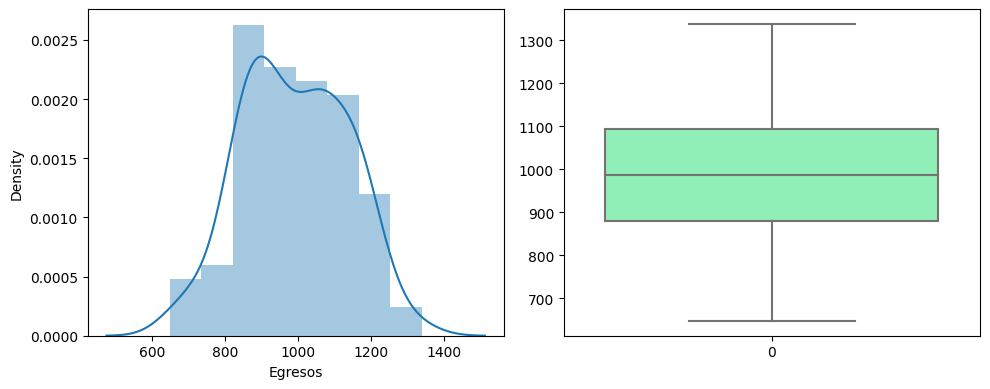

In [7]:
# Histograma y diagrama de cajas y bigotes

plt.figure(figsize=(10,4))
# Histograma
plt.subplot(1,2,1)
sns.distplot(df['Egresos'])
## Diagrama de cajas y bigotes
plt.subplot(1,2,2)
sns.boxplot(df['Egresos'],palette='rainbow')
plt.tight_layout() # para que no se superpongan las graficas;


In [8]:
print(f'Asimetría: {df.Egresos.skew()}')
print(f'Curtosis: {df.Egresos.kurtosis()}')

Asimetría: -0.0013512981019241433
Curtosis: -0.604614020520533


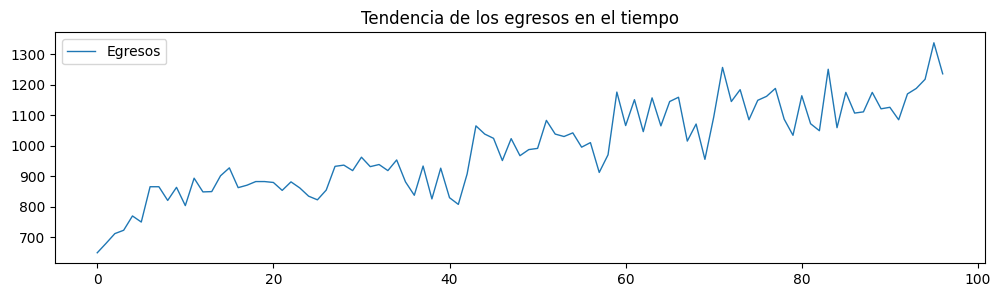

In [10]:
# Tencencia del conjunto de datos
df.plot.line(y='Egresos',figsize=(12,3),lw=1)
plt.title('Tendencia de los egresos en el tiempo');

# Prueba de normalidas

## Metódo gráfico

Se emplea el gráfico qq-plot de normalidad

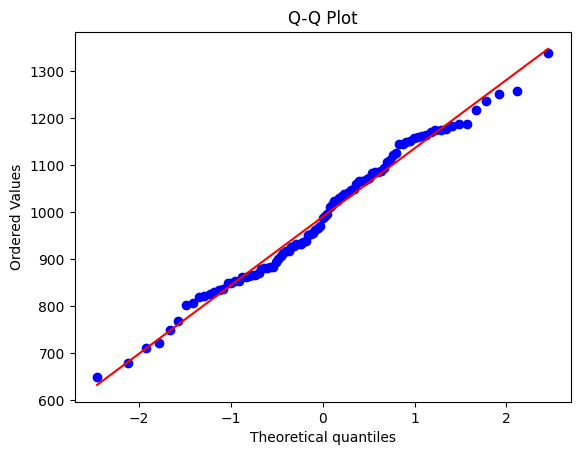

In [11]:
# Metódo Gráfico
import scipy.stats as stats
stats.probplot(df.Egresos, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

##  Pruebas de bondad y ajuste (shapiro wilks)

En estadística, la prueba de Shapiro–Wilk se usa para contrastar la normalidad de un conjunto de datos.

 Se plantea como hipótesis nula(H0) que una muestra proviene de una población normalmente distribuida. Como hipótesis alternativa(H1) que la muestra no proviene de una distribución normal.

 * H0: La distribución es normal
 * H1: La distribución no es normal

 * Nivel de significancia: 0.05 (Hipotético)

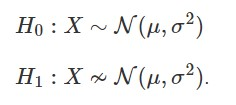




In [12]:
# Shapiro-Wilk test
# =======================
shapiro_test = stats.shapiro(df.Egresos)
shapiro_test

ShapiroResult(statistic=0.9846738576889038, pvalue=0.3209471106529236)

Interpretación: Siendo la hipótesis nula que la población está distribuida normalmente, si el p-valor es menor al nivel de significancia alfa, entonces la hipótesis nula se rechaza (concluyendo que los datos no vienen de una distribución normal). Si el p-valor es mayor a alfa, se concluye que no se puede rechazar dicha hipótesis.